### Imports libraries and Read data

In [27]:
import warnings
warnings.filterwarnings('ignore')

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
random_state = 42  # For reproducibility
sns.set_theme(style="darkgrid", font_scale=1, rc={"axes.titlesize":18}, palette="Set1")


In [30]:
url = "https://raw.githubusercontent.com/sagnikghoshcr7/Bank-Customer-Churn-Prediction/master/Churn_Modelling.csv"
df = pd.read_csv(url, header=0, index_col=0)


In [33]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 937.5+ KB


There is no null value in the dataset.

#### check duplicates data 

In [35]:
df.duplicated().any()

False

There is no duplicate data in the dataset.

### Exploratory Data Analysis (EDA) & Feature Preprocessing

In [32]:
df.drop(columns=["CustomerId","Surname"], inplace = True)

In [37]:
categorical = ["Geography", "Gender", "Tenure", "NumOfProducts", "HasCrCard", "IsActiveMember"]
numerical = ["CreditScore", "Age", "Balance", "EstimatedSalary"]

In [58]:
df["Exited"] = df["Exited"].astype("category")

In [38]:
for i in categorical:
    df[i] = df[i].astype("category")

In [39]:
for i in numerical:
    df[i] = df[i].astype("float64")

In [ ]:
df_num = df.select_dtypes(include=np.number)

#### Outlier Treatment

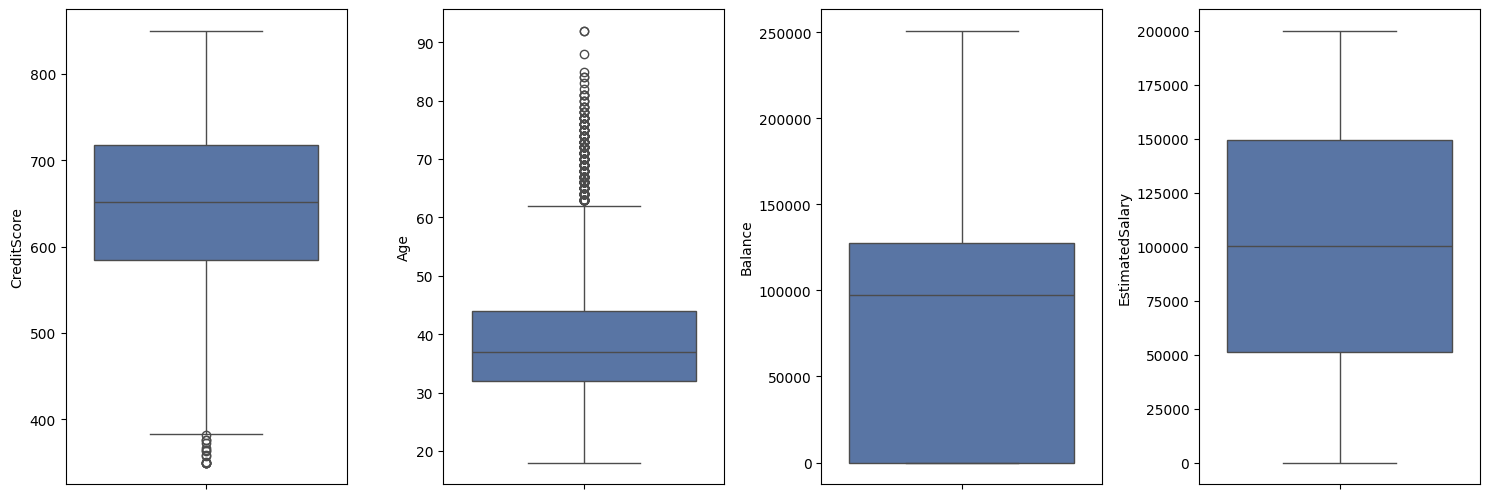

In [94]:
plt.figure (figsize=(15,10))

for i in range(len(numerical)):
    plt.subplot(1,len(numerical),i+1)
    sns.boxplot(df[numerical[i]])
    plt.tight_layout()

Credit Score has outliers. We will remove them using z-score.
Age looks some data is outliear but we will not remove them as it is possible that some customers are old.

In [46]:
import scipy.stats as stats

In [48]:
zscores = np.abs(stats.zscore(df["CreditScore"]))
filter = zscores < 3
df_clean = df[filter]
print("number of outliers removed:", zscores.shape[0] - filter.sum())

number of outliers removed: 8


#### Split the data into train and test

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
df_train, df_test = train_test_split(df_clean, test_size=0.2, random_state=random_state)

#### Exploratory Data Analysis ####

##### Target variable #####

In [161]:
Exit_label = {1:"Exited", 0:"Retained"}
custom_palette = {'1': 'red', '0': 'blue'}
custom_palette2 = {1: 'red', 0: 'blue'} # for the legend and hue


In [89]:
def add_values_labels(ax):
    total = sum([p.get_height() for p in ax.patches])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100*p.get_height()/total)  # format as percentage
        ax.annotate(percentage, (p.get_x()+p.get_width()/2.,p.get_height()), ha = "center", va="center", xytext=(0,5), fontsize=12, color="black",textcoords='offset points')


In [121]:
df["Exited"].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of Exited and Retained Customers')

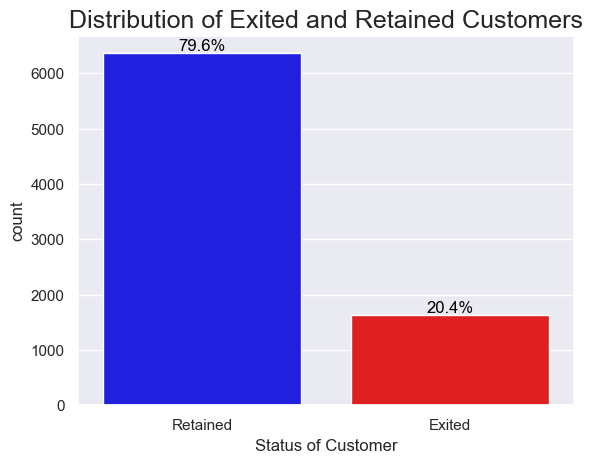

In [162]:
ax = sns.countplot(data=df_train, x="Exited", palette=custom_palette)
add_values_labels(ax)
ax.set_xticklabels(reversed(Exit_label.values()))
ax.set_xlabel("Status of Customer")
ax.set_title("Distribution of Exited and Retained Customers")


#### Numeric Features

In [154]:
custom_palette = {0: 'blue', 1: 'red'}  # Match the keys to the unique values in "Exited"


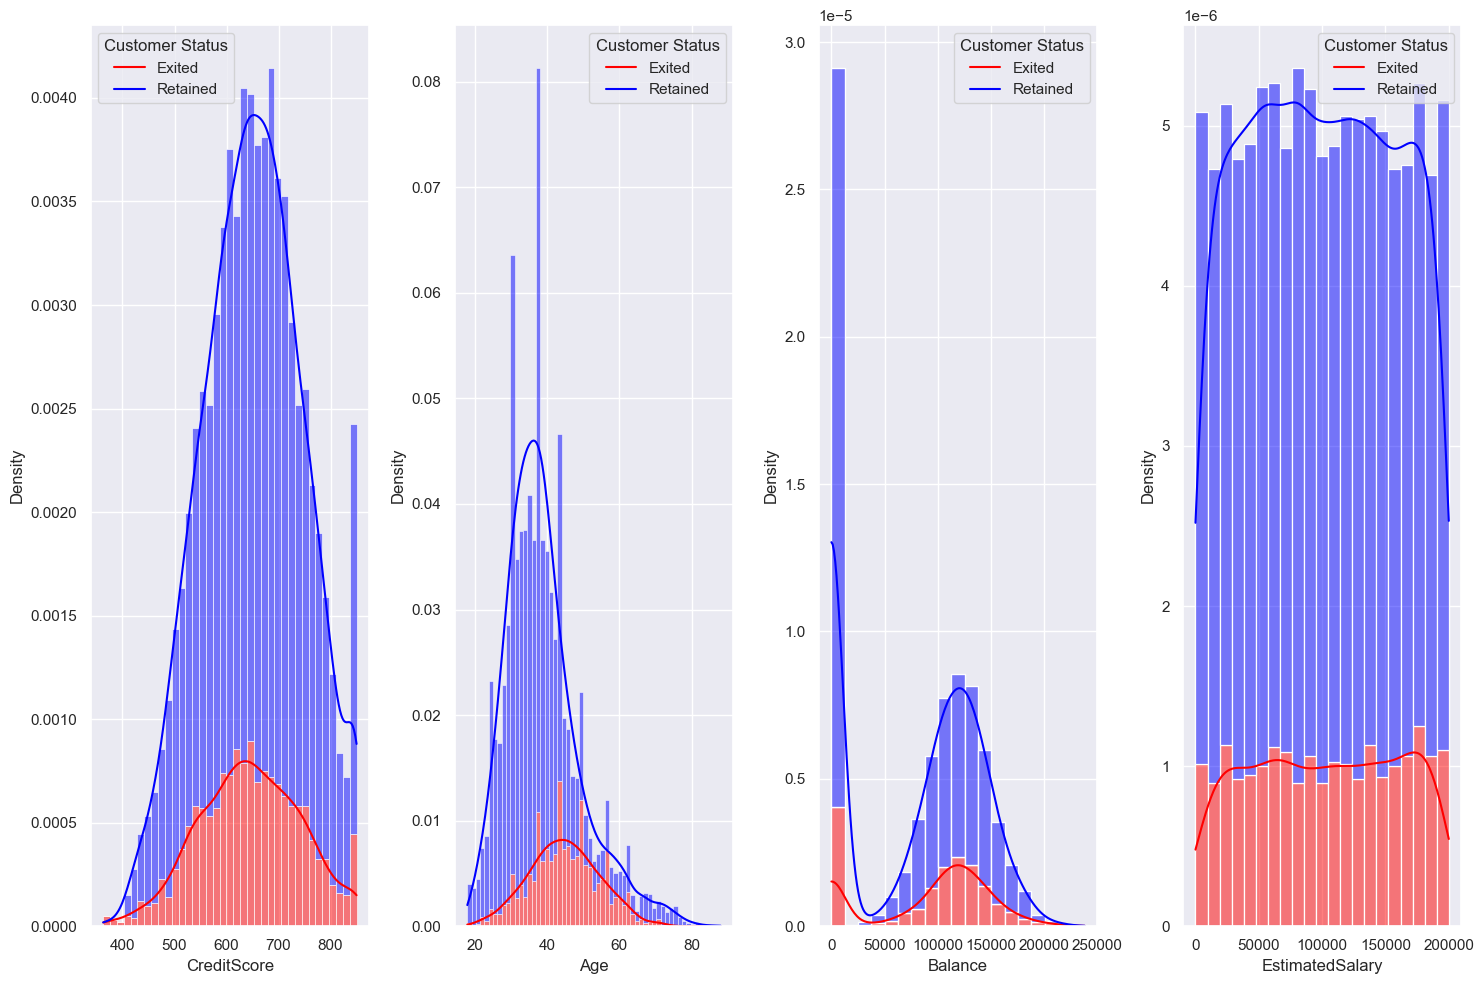

In [177]:
plt.figure(figsize=(15,10))

for i in range(len(numerical)):
    plt.subplot(1,len(numerical),i+1)
    sns.histplot(data=df_train, x=numerical[i], kde=True, hue="Exited", stat="density", palette=custom_palette2, alpha=0.5,multiple="stack")
    plt.legend(title="Customer Status", labels=Exit_label.values())
    plt.tight_layout()

In [175]:
categorical

['Geography',
 'Gender',
 'Tenure',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember']

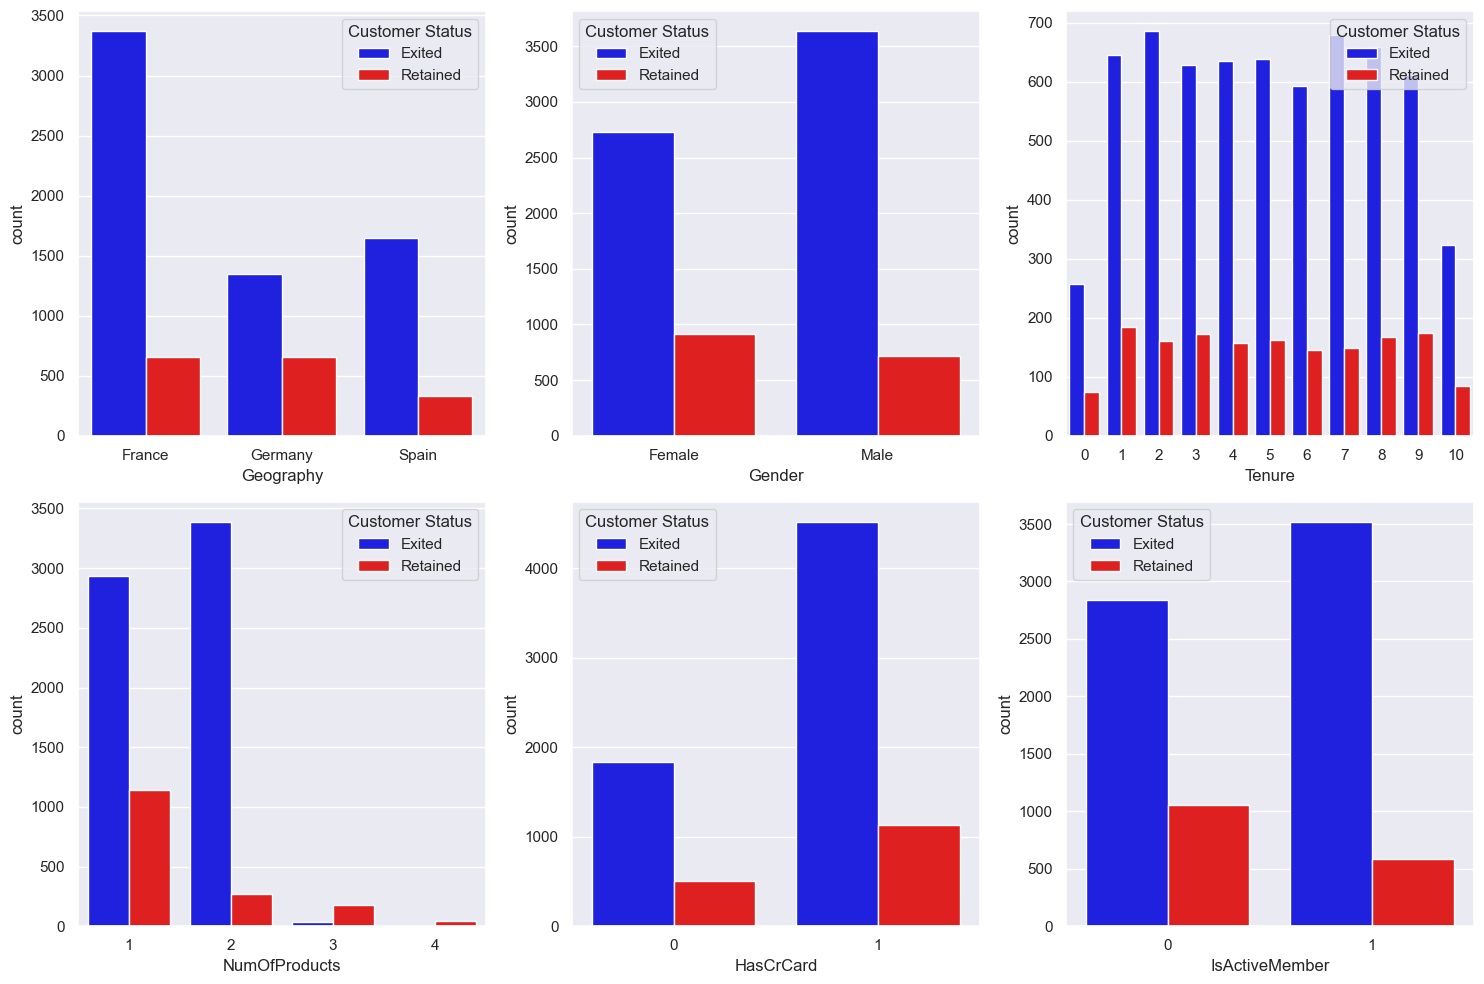

In [176]:
plt.figure(figsize=(15,10))

for i in range (len(categorical)):
    plt.subplot(2,3,i+1)
    sns.countplot(data=df_train, x=categorical[i], hue="Exited", palette=custom_palette2)
    plt.legend(title="Customer Status", labels=Exit_label.values())
    plt.tight_layout()